In [1]:
import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from pprint import pprint

from src.dataset import Dataset

In [2]:
topics_dates = Dataset().load_dataset(year=None, fields={"topic", "decision_date"})

## Topics year distribution

In [17]:
def norm(date, interval=5):
    return date - date%interval

# count all frequencies of intervals
all_freqs = defaultdict(lambda:0)
for el in topics_dates:
    d = norm(el['decision_date'])
    all_freqs[d] += 1

# compute topic frequencies normalized by the total of each interval
topic_dists = defaultdict(lambda:defaultdict(lambda:0))
for el in topics_dates:
    d = norm(el['decision_date'])
    t = el["topic"]
    topic_dists[t][d] += 1/all_freqs[d]    

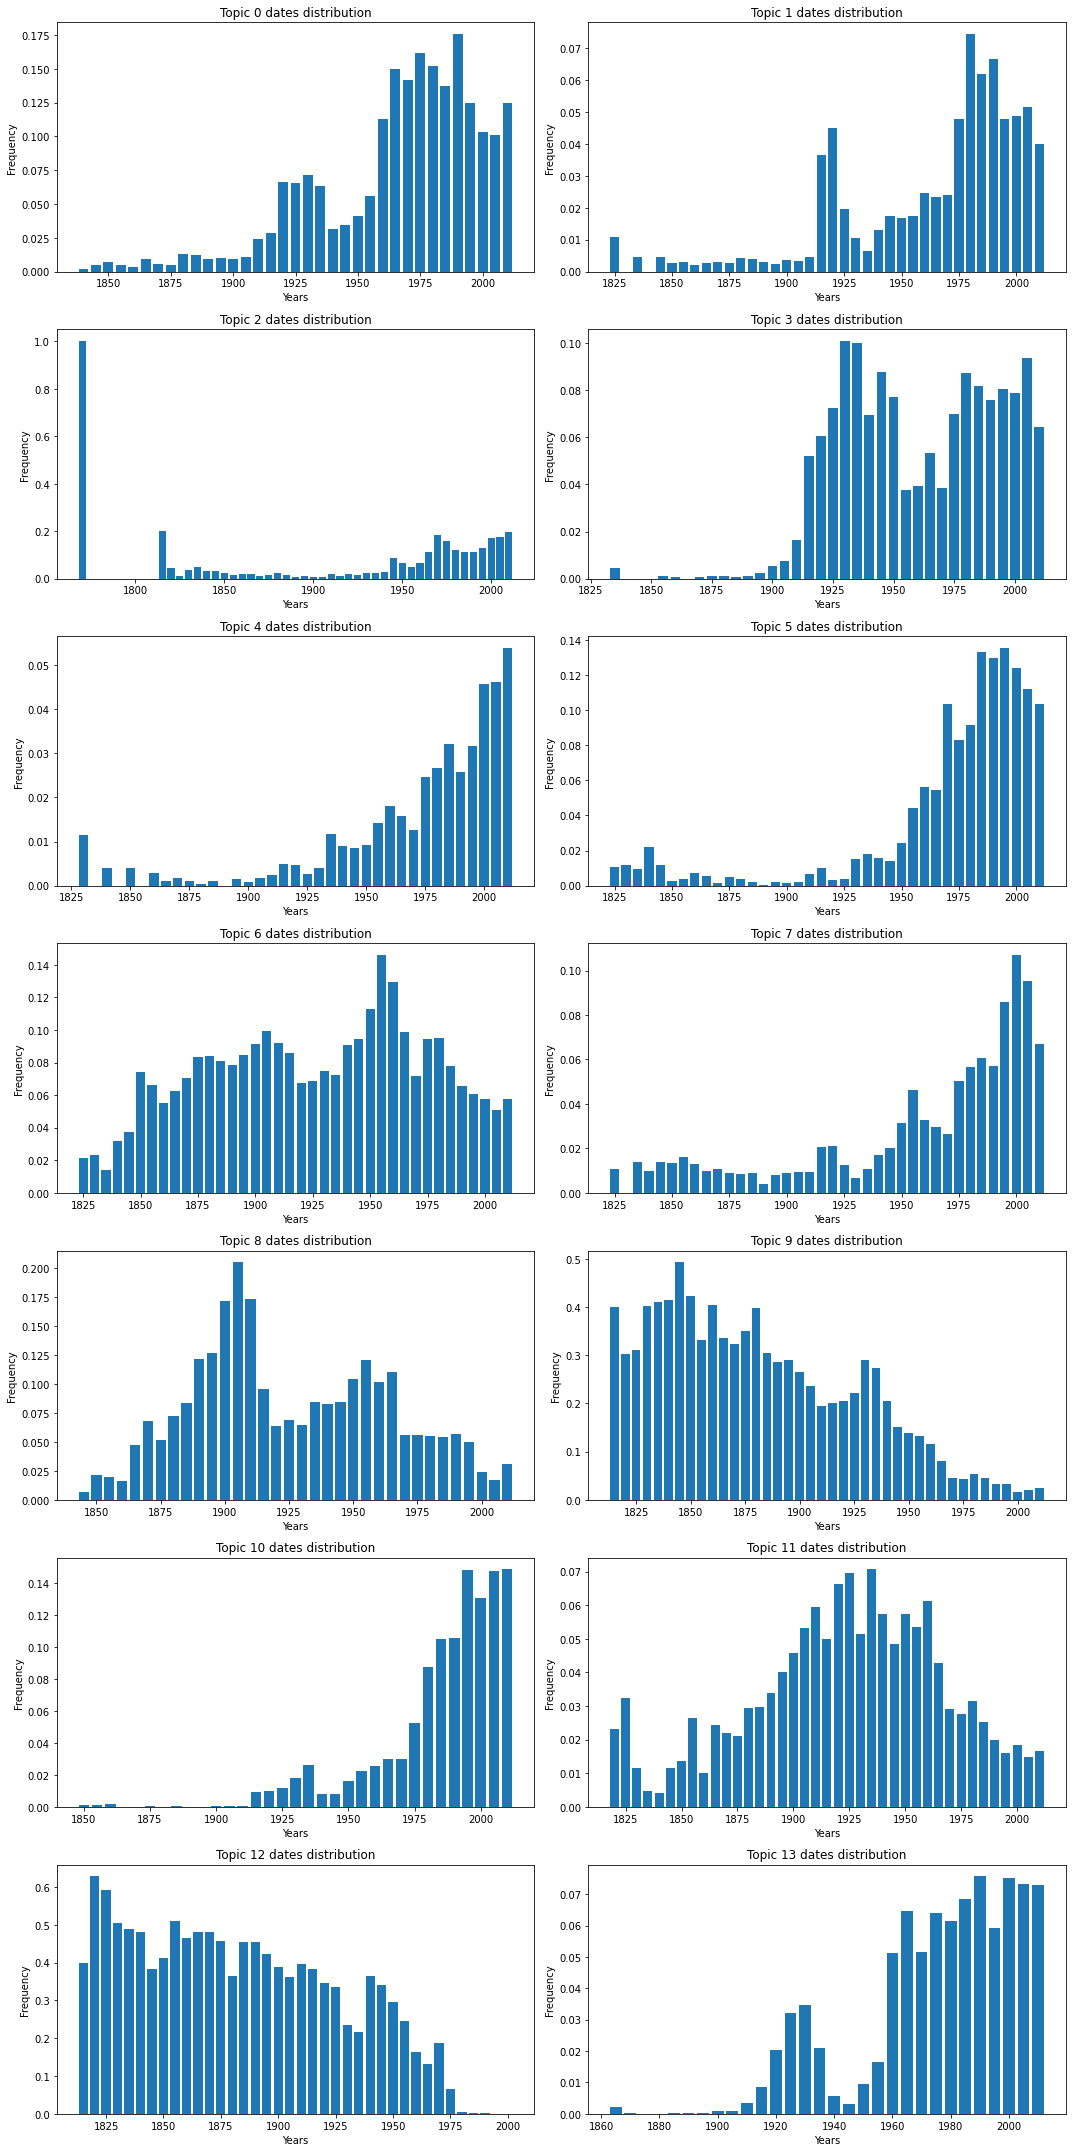

In [19]:
fig, axs = plt.subplots(7,2, figsize=(15,30))

for i in range(14):
    x = topic_dists[i].keys()
    y = topic_dists[i].values()
    axs[i//2][i%2].bar(x, y, width = 4)
    axs[i//2][i%2].set(title=f"Topic {i} dates distribution", xlabel="Years", ylabel="Frequency")
    
plt.tight_layout()
plt.savefig("../data/images/topics_year_distribution.jpeg", dpi=200)
plt.show()

## Courts topics distribution

In [5]:
court_topics = Dataset().load_dataset(year=None, fields={"topic", "court"})

In [29]:
courts_all_freqs = defaultdict(lambda:0)
for el in court_topics:
    c = el["court"]
    courts_all_freqs[c] += 1

court_freqs = defaultdict(lambda:[0]*14)

for el in court_topics:
    t = el["topic"]
    c = el["court"]
    court_freqs[c][t] += 1/courts_all_freqs[c]

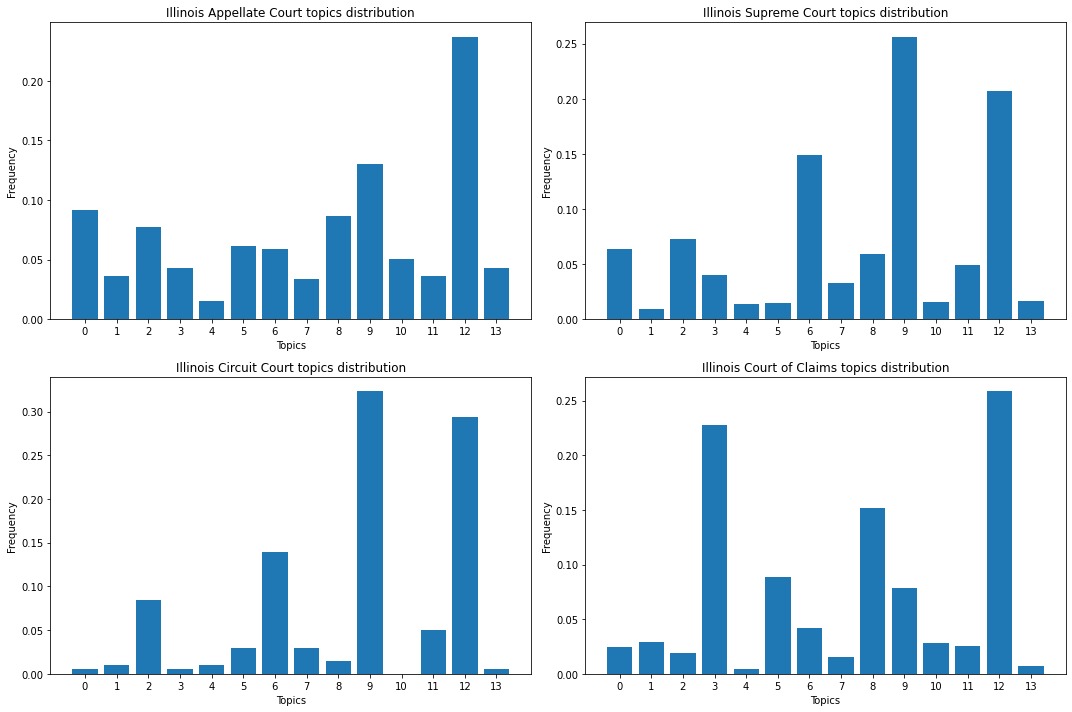

In [30]:
fig, axs = plt.subplots(2,2, figsize=(15,10))
x = range(14)
for i, (k, v) in enumerate(court_freqs.items()):
    axs[i//2][i%2].bar(x, v)
    axs[i//2][i%2].set(title=f"{k} topics distribution", xlabel="Topics", ylabel="Frequency", xticks=x)
    
plt.tight_layout()
plt.savefig("../data/images/courts_topics_distribution.jpeg", dpi=200)
plt.show()